<font size=6>**Maximum Likelihood Estimation**</font>
___

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Generate a sample of size 5000 from the **Normal distribution** $\mathcal{N}(\mu=2, \sigma=1.5)$.

In [3]:
rng = np.random.default_rng(seed=42)
mu = 2
sigma = 1.5
data = stats.norm.rvs(loc=mu , scale=sigma , size=5000)

# Negative Log Likelihood function for a Normal distribution

Compute the log likelihood for arrays of values of $\mu$ and $\sigma$.\
See *numpy*'s broadcasting rules: <https://numpy.org/devdocs/user/theory.broadcasting.html>.

In [4]:
def norm_loglik(sample, mu, sigma):
    """
    Compute log-likelihood for Normal dist
    Takes 3 arrays as input
    If one input is scalar, then it must be given as np.array([scalar])
    returns an array of shape (len(sigma), len(mu))
    """
    n = len(sample)
    ll = 0.5 * ((sample[:, np.newaxis] - mu[np.newaxis, :]) ** 2).sum(axis=0)
    ll = ll[np.newaxis, :] / (sigma[:, np.newaxis] ** 2)
    ll += n / 2 * np.log(2 * np.pi * sigma[:, np.newaxis] ** 2)
    return ll

## Variation of the NLL as a function of $\mu$

Plot the variation of the LL for $-2 \le \mu \le 6$ and $\sigma=1.5$.

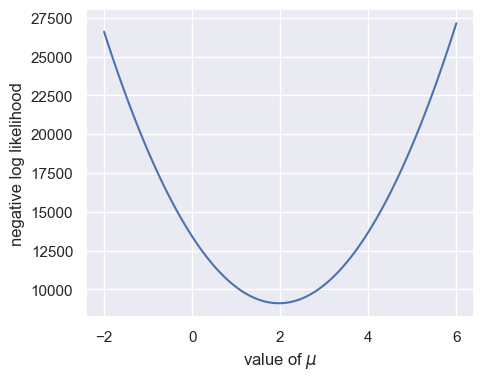

In [5]:
m = np.linspace(-2, 6, 101)
s = np.array([1.5])
nll = norm_loglik(data, m, s).ravel()

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(m, nll)
ax.set_xlabel(r"value of $\mu$")
ax.set_ylabel("negative log likelihood");

## Variation of the NLL as a function of $\sigma$

Plot the variation of the LL for $\mu = 2$ and $1 \le \sigma \le 3$.

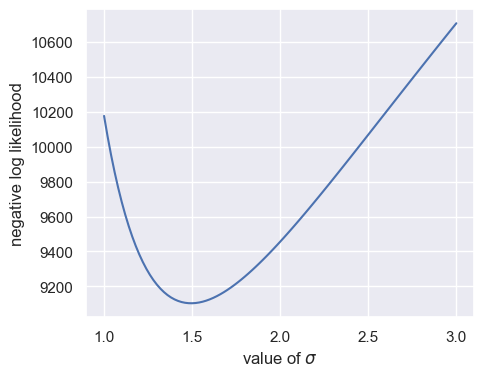

In [6]:
s = np.linspace(1, 3, 101)
m = np.array([2])
nll = norm_loglik(data, m, s).ravel()

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(s, nll)
ax.set_xlabel(r'value of $\sigma$')
ax.set_ylabel('negative log likelihood');

## Variation of the NLL as a function of both $\mu$ and $\sigma$

Plot the variation of the LL for $0 \le \mu \le 4$ and $1 \le \sigma \le 3$.

In [7]:
m = np.linspace(0, 4, 101)
s = np.linspace(1, 3, 101)
M, S = np.meshgrid(m, s)
Z = norm_loglik(data, m, s)

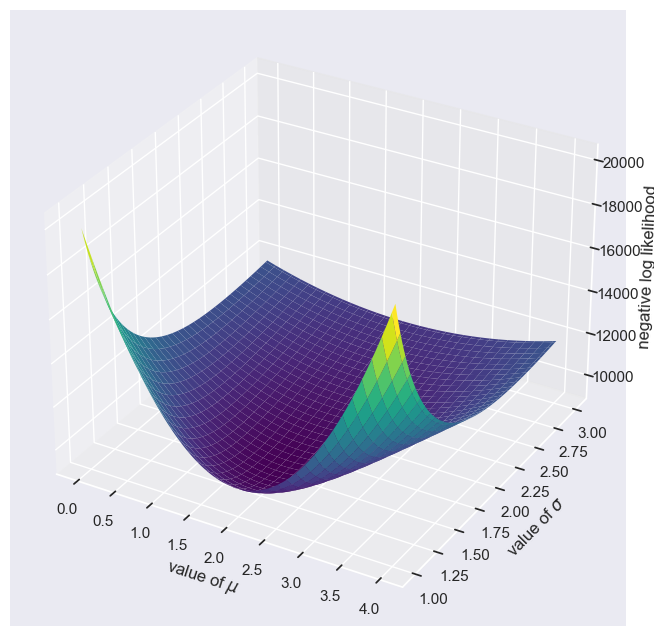

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection' : '3d'})
ax.plot_surface(M, S, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel(r'value of $\mu$')
ax.set_ylabel(r'value of $\sigma$')
ax.set_zlabel('negative log likelihood');

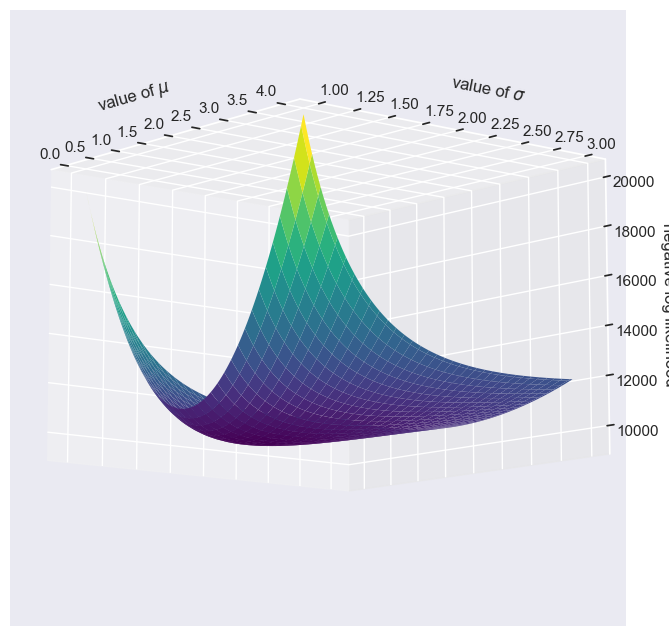

In [9]:
ax.view_init(elev=-10, azim=-40, roll=0)
fig

# Computing the MLE

Compute the MLE for `data`. Use `scipy.stats.rv_continuous.fit`.  
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html>

In [10]:
mu_fit, sigma_fit = stats.norm.fit(data)

In [11]:
mu_fit

np.float64(1.9692807606600868)

In [14]:
print(f'sample mean        : {data.mean():0.5f}')
print(f'MLE of the mean    : {mu_fit:0.5f}')
print(f'sample std dev     : {data.std(ddof=1):0.5f}')  # use the unbiased estimator
print(f'MLE of the std dev : {sigma_fit:0.5f}')

sample mean        : 1.96928
MLE of the mean    : 1.96928
sample std dev     : 1.49412
MLE of the std dev : 1.49397


# Use of *scipy.optimize.minimize* to find the MLE
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html>

We first need to rewrite a function consistent with *scipy.optimize*.

In [15]:
def norm_loglik_scalar(x, data):
    """
    Compute log-likelihood for Normal dist
    x is an array that contains the scalars mu and sigma
    """
    mu, sigma = x
    n = len(data)
    ll = 0.5 * ((data - mu) ** 2).sum() / (sigma ** 2)
    ll += n / 2 * np.log(2 * np.pi * sigma ** 2)
    return ll

Initial guess

In [16]:
x0 = np.array([0,1])

Run the optimizer

In [17]:
res = opt.minimize(fun=norm_loglik_scalar, x0=x0 , args=(data), options={'disp': True})

Optimization terminated successfully.
         Current function value: 9101.887967
         Iterations: 12
         Function evaluations: 51
         Gradient evaluations: 17


In [18]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9101.887966755476
        x: [ 1.969e+00  1.494e+00]
      nit: 12
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 4.325e-04 -1.672e-06]
            [-1.672e-06  2.210e-04]]
     nfev: 51
     njev: 17

Print the results

In [20]:
print('scipy.optimize.minimize')
print(f'  MLE of the mean    : { res.x[0]:0.5f}')
print(f'  MLE of the std dev : { res.x[1]:0.5f}')
print('scipy.stats.fit')
print(f'  MLE of the mean    : { mu_fit:0.5f}')
print(f'  MLE of the std dev : { sigma_fit:0.5f}')

scipy.optimize.minimize
  MLE of the mean    : 1.96928
  MLE of the std dev : 1.49397
scipy.stats.fit
  MLE of the mean    : 1.96928
  MLE of the std dev : 1.49397


# *t* distribution:  generate a sample and fit with MLE

Generate a sample from the **Student's *t* distribution**.  

In `numpy`, only the standard *t* distribution is available. We will use `scipy` to add location and scale.   

- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_t.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [21]:
nu = 5
loc = 2
scale = 1.5
data_t = stats.t.rvs(df=nu , loc=loc , scale=scale , size=5000 , random_state=rng)

Compute the MLE for `data_t`. Use `scipy.stats.rv_continuous.fit`.\
<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html>

In [22]:
shape_fit, loc_fit, scale_fit = stats.t.fit(data_t)

print(f'theoretical std dev       : { scale*np.sqrt(nu/(nu-2)):0.5f}')
print(f'sample mean               : { data_t.mean():0.5f}')
print(f'sample std dev            : { data_t.std(ddof=1):0.5f}')
print(f'MLE of the location param : { loc_fit:0.5f}')
print(f'MLE of the scale param    : { scale_fit:0.5f}')
print(f'MLE of the df             : { shape_fit:0.5f}')

theoretical std dev       : 1.93649
sample mean               : 1.95541
sample std dev            : 1.93701
MLE of the location param : 1.96714
MLE of the scale param    : 1.46658
MLE of the df             : 4.60577
